In [236]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
import pickle

In [155]:
data = datasets.load_iris()

In [156]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [157]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [158]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [159]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [160]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [161]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What problem we are trying to solve?
### We are trying to use attributes of flowers to predict the species of flower. We are trying to use the sepal length and width and the petal length and width to predict of an iris flower is of type Setosa, Versicolor, Virginica

## Create pandas DataFrame from the data

In [162]:
df = pd.DataFrame(data['data'],columns=data["feature_names"])

In [163]:
df['target'] = data['target']

In [164]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Basic descreptive statistics

In [165]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## distribution of features and target

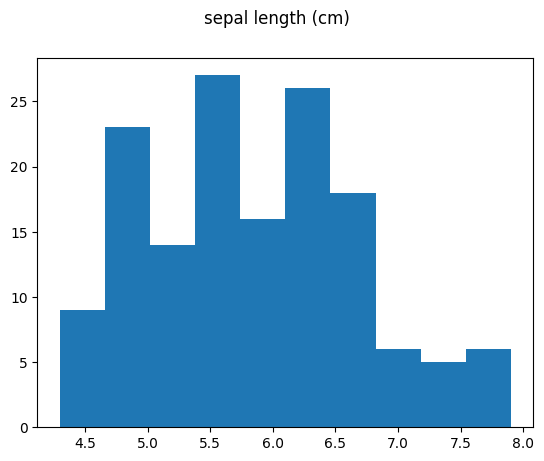

In [166]:
col = "sepal length (cm)"
df[col].hist(grid=False)
plt.suptitle(col)
plt.show()

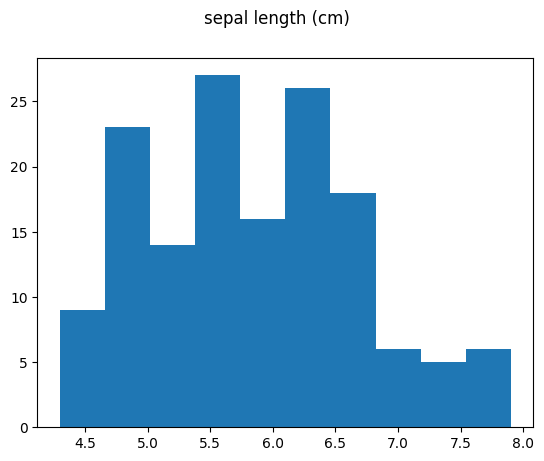

In [167]:
ccol = "sepal width (cm)"
df[col].hist(grid=False)
plt.suptitle(col)
plt.show()

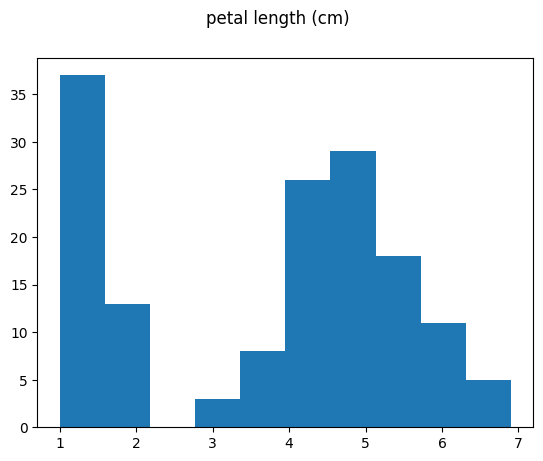

In [168]:
col = "petal length (cm)"
df[col].hist(grid=False)
plt.suptitle(col)
plt.show()

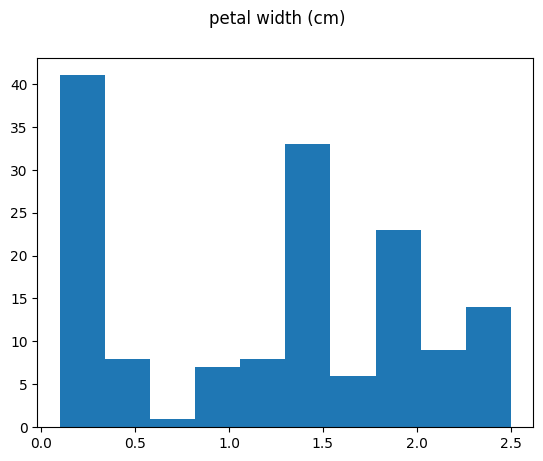

In [169]:
col = "petal width (cm)"
df[col].hist(grid=False)
plt.suptitle(col)
plt.show()

## Relationship of data features with the target

In [170]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [171]:
df['target_name'] = df['target'].map({0:'setosa', 1: 'versicolor', 2:'virginica'})

In [172]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


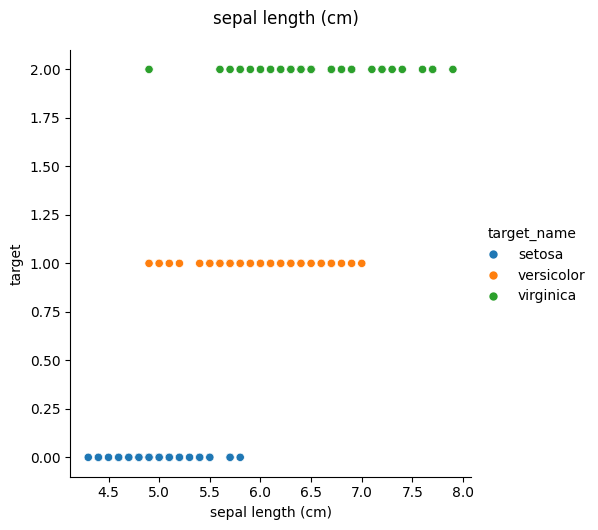

In [173]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target",hue='target_name', data=df)
plt.suptitle(col,y=1.05)
plt.show()

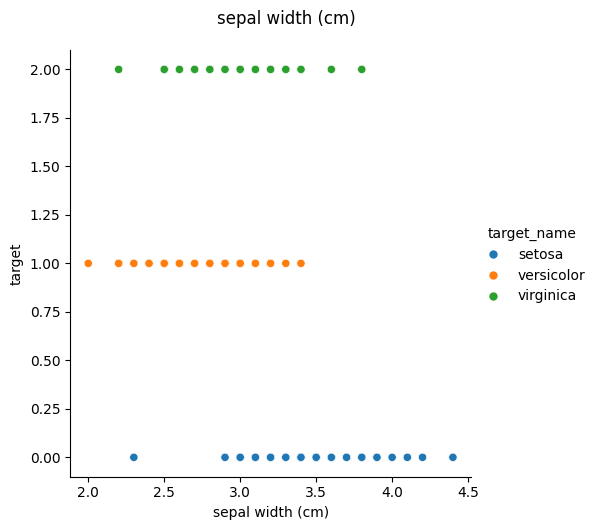

In [174]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target",hue='target_name', data=df)
plt.suptitle(col,y=1.05)
plt.show()

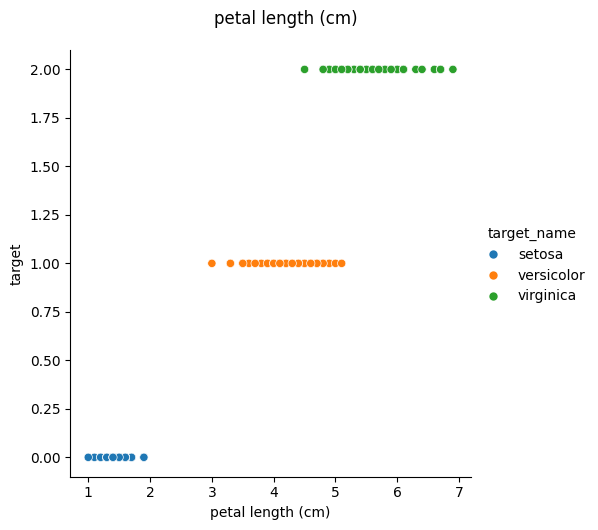

In [175]:
col = "petal length (cm)"
sns.relplot(x=col, y="target",hue='target_name', data=df)
plt.suptitle(col,y=1.05)
plt.show()

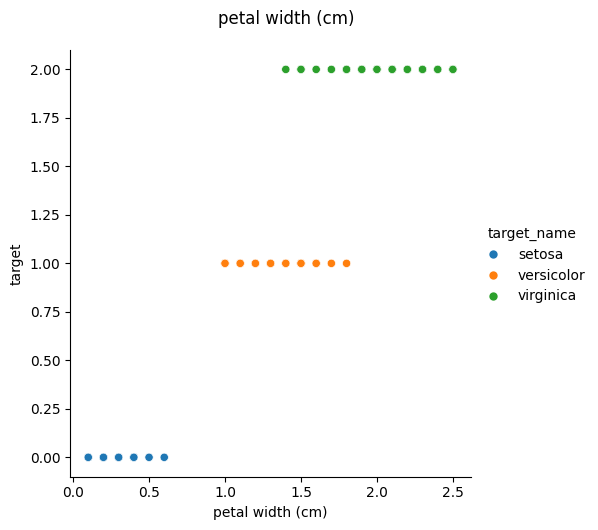

In [176]:
col = "petal width (cm)"
sns.relplot(x=col, y="target",hue='target_name', data=df)
plt.suptitle(col,y=1.05)
plt.show()

## Exploratory Data Analysis - Pairplots

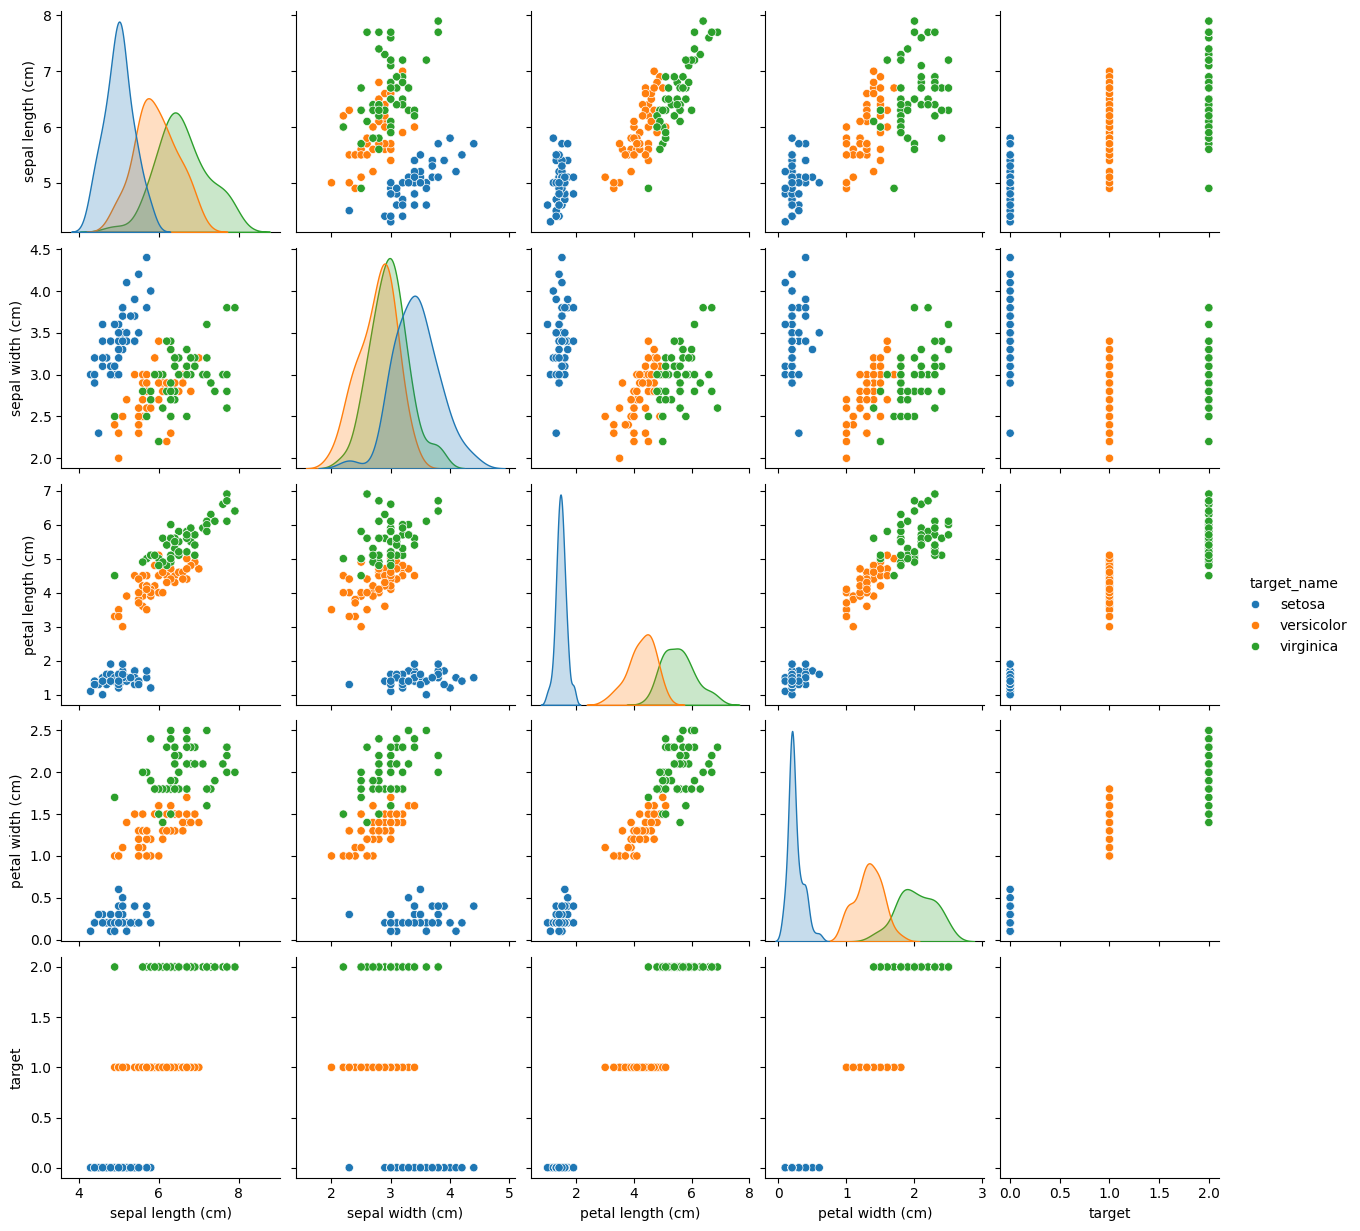

In [177]:
sns.pairplot(df, hue='target_name')

## Train Test Split

### Always evaluate final model on a test set that hasn't been used at all in the training process. So, we will split off a tests set here. 


### Note: This might be little less true if use cross-validation, but it is considered best practices.

In [178]:
df_train,df_test = train_test_split(df,test_size=0.25)

In [179]:
df_train.shape

(112, 6)

In [180]:
df_test.shape

(38, 6)

In [181]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
105,7.6,3.0,6.6,2.1,2,virginica
16,5.4,3.9,1.3,0.4,0,setosa
88,5.6,3.0,4.1,1.3,1,versicolor
15,5.7,4.4,1.5,0.4,0,setosa
27,5.2,3.5,1.5,0.2,0,setosa


## Prepare Data for modeling
Spliting the data back out inot plain numpy arrays

In [182]:
x_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train['target'].values

## Modeling - what is baseline?
### What is the simplest, model we can think of?

### Im this case, if our baseline model is just randomly guessing the species of flower, or guessing a singl species for every datapoint, we would expect to have a model accuracy of 0.33 or 33%, since we have 3 different classes that are evenly balanced.
### So our models should have atleast best 33% accuracy

## Modeling - Simple manual model
### Let's manually look at our data and decide some cutoff points for classification.

In [183]:
def single_feature_prediction(petal_length):
    ### Predict thte iris species given the petal length.
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [184]:
df_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

In [185]:
x_train[:,2]

array([6.6, 1.3, 4.1, 1.5, 1.5, 1.6, 1.4, 6.4, 5.7, 5.8, 1.3, 5.6, 4.9,
       4.6, 4.2, 4.4, 4.8, 5.6, 1.4, 1.4, 6.1, 5.6, 4.5, 4.7, 4.8, 6. ,
       3.6, 6.9, 1.5, 1.5, 1.6, 1.4, 4.4, 4.7, 4.5, 5.3, 5.9, 5.1, 1.4,
       4.9, 1.6, 4.9, 1.4, 1.5, 4.9, 1.2, 5. , 1.5, 1.6, 4.2, 3.9, 6.1,
       4.5, 1.9, 4.5, 5.1, 5.1, 1.3, 4.5, 4.8, 1.5, 1.7, 4. , 3.7, 5.1,
       1.4, 4.5, 1.4, 4.5, 4.9, 5.1, 4.3, 4.2, 1. , 1.4, 5.5, 3.3, 1.4,
       5.6, 1.2, 6.1, 6.3, 5.6, 1.7, 5. , 4. , 4. , 5.1, 4.7, 1.5, 1.3,
       5.1, 4. , 4.4, 4.1, 5.2, 3.9, 4.6, 1.5, 4.7, 5.1, 3.5, 4.2, 1.6,
       3.8, 1.9, 5. , 3.3, 1.1, 1.4, 5.9, 5.4])

In [186]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:,2]])

In [187]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [188]:
print(f"Manual Model Accuracy : {manual_model_accuracy * 100}")

Manual Model Accuracy : 95.53571428571429


## Modeling - Logistics Regression

### Validation for model

In [189]:
model = LogisticRegression(max_iter=200)

In [190]:
#
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [191]:
model.fit(xt, yt)

LogisticRegression(max_iter=200)

In [192]:
y_pred = model.predict(xv)

In [193]:
np.mean(y_pred == yv)

np.float64(1.0)

In [194]:
model.score(x_train, y_train)  ## Never evauate a model on the same data that was used for training

0.9821428571428571

In [195]:
model.score(xv,yv)

1.0

### Cross validation to evaluate the model

In [196]:
model = LogisticRegression(max_iter=200)

In [197]:
accuracies = cross_val_score(model,x_train, y_train,cv=10, scoring='accuracy')

In [198]:
np.mean(accuracies)

np.float64(0.9553030303030303)

## Where are we missing classifying points?

In [199]:
y_pred =cross_val_predict(model,x_train,y_train,cv=5)

In [200]:
predicted_correctly_mask = y_pred == y_train

In [201]:
np.mean(y_pred==y_train)

np.float64(0.9642857142857143)

In [202]:
df_predictions = df_train.copy()

In [203]:
df_predictions["correct_predition"] = predicted_correctly_mask

In [204]:
df_predictions['prediction'] = y_pred

In [205]:
df_predictions["prediction_label"] = df_predictions['prediction'].map({0:'setosa', 1: 'versicolor', 2:'virginica'})

In [206]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predition,prediction,prediction_label
105,7.6,3.0,6.6,2.1,2,virginica,True,2,virginica
16,5.4,3.9,1.3,0.4,0,setosa,True,0,setosa
88,5.6,3.0,4.1,1.3,1,versicolor,True,1,versicolor
15,5.7,4.4,1.5,0.4,0,setosa,True,0,setosa
27,5.2,3.5,1.5,0.2,0,setosa,True,0,setosa


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

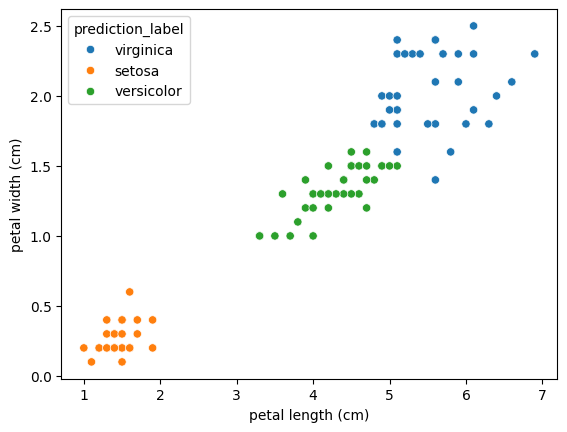

In [207]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue = 'prediction_label',data=df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

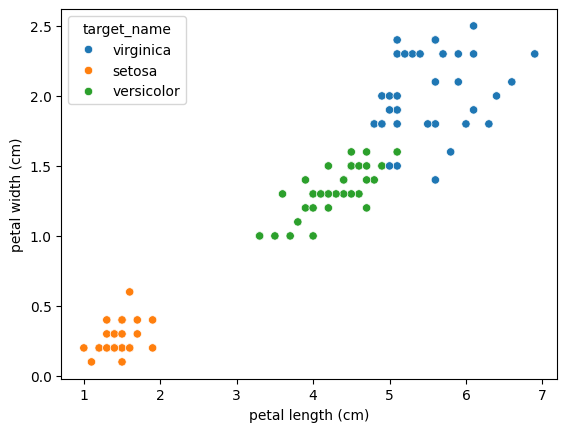

In [208]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue = 'target_name',data=df_predictions)

In [209]:
def plot_incorrect_predictions(df_predcitions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2,2, figsize = (10,10))
    axs = axs.flatten()
    sns.scatterplot(x= x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predcitions,ax=axs[0])
    sns.scatterplot(x= x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predcitions,ax=axs[1])
    sns.scatterplot(x= x_axis_feature, y=y_axis_feature, hue="correct_predition", data=df_predcitions,ax=axs[2])
    axs[3].set_visible(False)

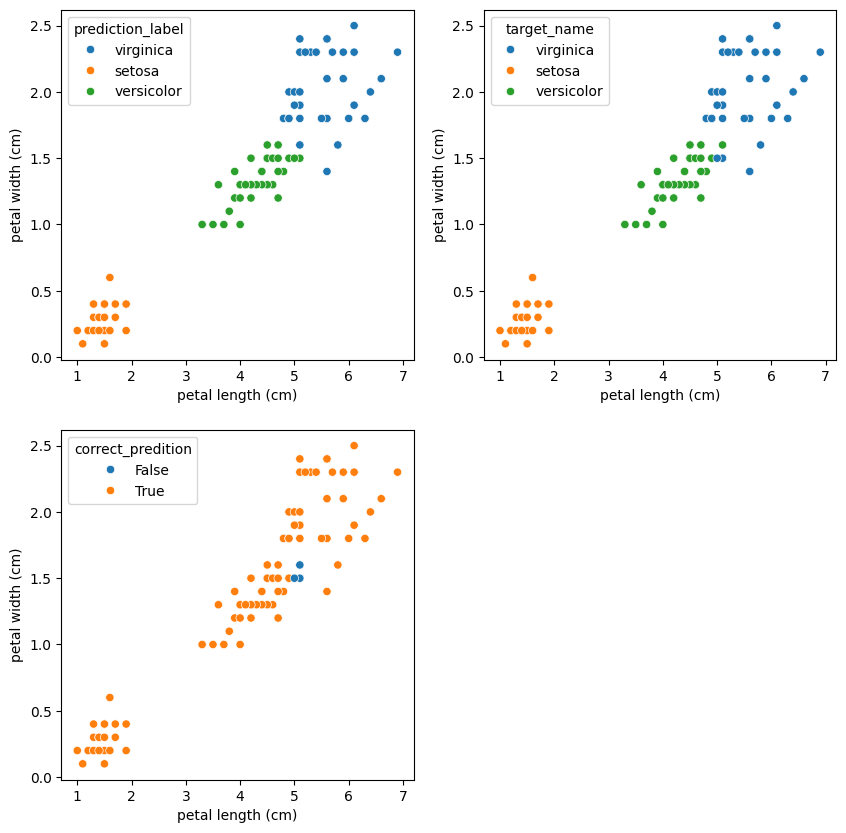

In [210]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

## Model Tuning

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
model = RandomForestClassifier()

In [213]:
acc = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [214]:
np.mean(acc)

np.float64(0.9466403162055336)

## Model Tuning

Model Tuning is trying to determine the parameters of your models (these are also knwon as "hyperparameters") that maximize the model performance

In [215]:
for reg_param in (1, 1.3, 1.8 ,1.9, 2, 2.3, 2.5):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy : {np.mean(accuracies) * 100:2f}")

1
Accuracy : 96.403162
1.3
Accuracy : 96.403162
1.8
Accuracy : 96.403162
1.9
Accuracy : 96.403162
2
Accuracy : 96.403162
2.3
Accuracy : 96.403162
2.5
Accuracy : 96.403162


## Final Model

In [216]:
model = LogisticRegression(max_iter=200, C=2)

## How well does our model do on the test set

In [225]:
x_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test['target'].values

In [226]:
x_test.shape

(38, 4)

In [227]:
y_test

array([0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0])

## Tain our final model using our full training dataset

In [228]:
model.fit(x_train,y_train)

LogisticRegression(C=2, max_iter=200)

In [229]:
y_test_pred = model.predict(x_test)

In [230]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [231]:
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}")

Test set accuracy: 94.74


In [232]:
test_set_correctly_classified

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [233]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_predition"] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test['prediction'].map({0:'setosa', 1: 'versicolor', 2:'virginica'})

In [234]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_predition,prediction,prediction_label
36,5.5,3.5,1.3,0.2,0,setosa,True,0,setosa
91,6.1,3.0,4.6,1.4,1,versicolor,True,1,versicolor
77,6.7,3.0,5.0,1.7,1,versicolor,False,2,virginica
100,6.3,3.3,6.0,2.5,2,virginica,True,2,virginica
20,5.4,3.4,1.7,0.2,0,setosa,True,0,setosa


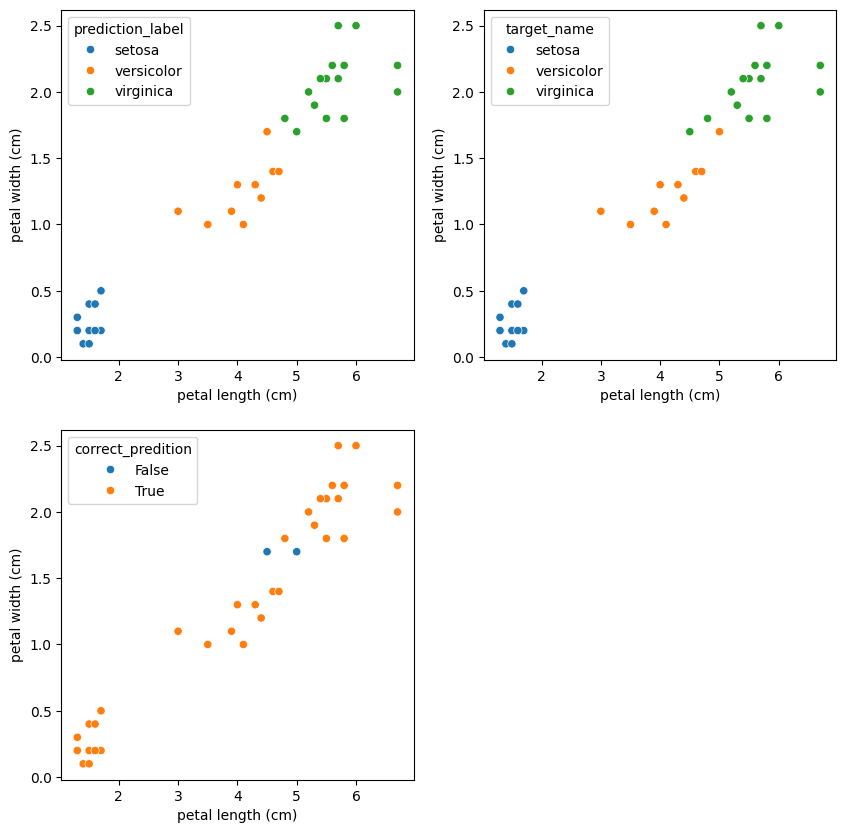

In [235]:
plot_incorrect_predictions(df_predictions_test, 'petal length (cm)', 'petal width (cm)')

## In conclusion

We achieved 95% accuracy on the test dataset using a Logistic Regression Model parameters: 



LogisticRegression(C=2, max_iter=200)
